# CwnNodeVec

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append("../")

In [2]:
import pickle
from itertools import chain
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [3]:
from MWE2019.cwn_node_vec import CwnNodeVec
from MWE2019.cwn_vectors import CwnVectors

## node2vec random walk parameters

|    feature | structure equivalence |  homophily     |
|------------|:-----------------------:|:----------------:|
|  algorithm |        BFS            |     DFS        |
|  node2vec  |  p↓, q↑               |     p↑, q↓     |

Where p is return parameter and q is in-out parameter

In [6]:
cwn_nv_eq = CwnNodeVec(name='structeq', dimensions=100, walk_length=10, num_walks=20, p=0.5, q=2)
cwn_nv_homo = CwnNodeVec(name='homophily', dimensions=100, walk_length=10, num_walks=20, p=2, q=0.5)
cwn_nv_rw = CwnNodeVec(name='randomwalk', dimensions=100, walk_length=10, num_walks=20, p=1, q=1)

load CwnNodeVec from cache:  ..\MWE2019\..\data\cache_cwn_node_vec\cwn_node_vec_structeq.pkl
load CwnNodeVec from cache:  ..\MWE2019\..\data\cache_cwn_node_vec\cwn_node_vec_homophily.pkl
load CwnNodeVec from cache:  ..\MWE2019\..\data\cache_cwn_node_vec\cwn_node_vec_randomwalk.pkl


## single-character word from FastText pretrained embeddings

In [7]:
from gensim.models import KeyedVectors
cwn_vec = CwnVectors()
cwn_kv = KeyedVectors(cwn_vec.dim)
cwn_kv.add([cwn_vec.itos[i] for i in range(len(cwn_vec.itos))], cwn_vec.vectors)

load from cache:  E:\LangOn\MWE2019\data\cache_cwn_vectors\cwn_vectors.pkl


In [8]:
cwn_kv.most_similar('養', topn=10)

[('認', 0.9780995845794678),
 ('產', 0.9743243455886841),
 ('說', 0.9737245440483093),
 ('還', 0.9735196232795715),
 ('當', 0.9732926487922668),
 ('窮', 0.9731267094612122),
 ('卻', 0.9730618000030518),
 ('讓', 0.9728891849517822),
 ('歸', 0.9728533029556274),
 ('殺', 0.9722965955734253)]

In [9]:
cwn_kv.most_similar('兒', topn=10)

[('潔', 0.973732054233551),
 ('與', 0.9711471796035767),
 ('凱', 0.9703478813171387),
 ('絲', 0.9701326489448547),
 ('蓮', 0.9700840711593628),
 ('當', 0.9694665670394897),
 ('卻', 0.9692337512969971),
 ('喬', 0.9688867926597595),
 ('讓', 0.9688305258750916),
 ('莊', 0.9685534238815308)]

In [10]:
cwn_kv.most_similar('風', topn=10)

[('時', 0.9724650382995605),
 ('當', 0.972414493560791),
 ('則', 0.9717159867286682),
 ('與', 0.9709925651550293),
 ('雲', 0.9704269766807556),
 ('之', 0.9703137278556824),
 ('還', 0.9702140092849731),
 ('並', 0.9701560735702515),
 ('雖', 0.9701269865036011),
 ('卻', 0.9700703620910645)]

In [11]:
cwn_kv.most_similar('風景', topn=10)

[('風光', 0.959679365158081),
 ('景觀', 0.952193021774292),
 ('景色', 0.9506864547729492),
 ('名勝', 0.9477312564849854),
 ('優美', 0.9443559646606445),
 ('場景', 0.9387326240539551),
 ('遠景', 0.9385495185852051),
 ('遊覽', 0.9379920363426208),
 ('領略', 0.9359688758850098),
 ('夜景', 0.9358265399932861)]

## node embeddings

In [12]:
from pprint import pprint
def show_nv_samples(word):
    print("--- Homophily ---")
    pprint(cwn_nv_homo.node_most_similar(word))
    print("--- Random Walk ---")
    pprint(cwn_nv_rw.node_most_similar(word))
    print("--- Structure Equivalence ---")
    pprint(cwn_nv_eq.node_most_similar(word))

In [13]:
show_nv_samples('養')

--- Homophily ---
[('餵', 0.8972288966178894),
 ('畜', 0.8379783034324646),
 ('飼', 0.8221665620803833),
 ('蓄', 0.8183460831642151),
 ('撫', 0.7352026104927063)]
--- Random Walk ---
[('餵', 0.905147910118103),
 ('蓄', 0.8543225526809692),
 ('畜', 0.8442349433898926),
 ('飼', 0.7797045707702637),
 ('撫', 0.7777304649353027)]
--- Structure Equivalence ---
[('畜', 0.9135547876358032),
 ('餵', 0.912987232208252),
 ('蓄', 0.8916459083557129),
 ('飼', 0.8151147365570068),
 ('撫', 0.7542983889579773)]


In [14]:
show_nv_samples('兒')

--- Homophily ---
[('鳳', 0.9601813554763794),
 ('男', 0.9254202842712402),
 ('娃', 0.9033308625221252),
 ('犢', 0.8762232065200806),
 ('仔', 0.8657761216163635)]
--- Random Walk ---
[('鳳', 0.9728346467018127),
 ('男', 0.9188355207443237),
 ('女', 0.875070333480835),
 ('犢', 0.8745706081390381),
 ('娃', 0.8691387176513672)]
--- Structure Equivalence ---
[('鳳', 0.9629033803939819),
 ('男', 0.9488214254379272),
 ('犢', 0.9092534780502319),
 ('娃', 0.8866438269615173),
 ('仔', 0.8721786737442017)]


In [15]:
show_nv_samples('豬')

--- Homophily ---
[('羊', 0.9630019068717957),
 ('蛇', 0.9614315032958984),
 ('猴', 0.9524335265159607),
 ('鼠', 0.9457031488418579),
 ('豚', 0.9422175884246826)]
--- Random Walk ---
[('羊', 0.9697642922401428),
 ('猴', 0.9639137983322144),
 ('蛇', 0.9636883735656738),
 ('豕', 0.9621343612670898),
 ('鼠', 0.9571025967597961)]
--- Structure Equivalence ---
[('猴', 0.9762941598892212),
 ('鼠', 0.9735512733459473),
 ('羊', 0.9707208871841431),
 ('蛇', 0.9686909317970276),
 ('犬', 0.9549028873443604)]


In [16]:
show_nv_samples('風')

--- Homophily ---
[('頌', 0.8811260461807251),
 ('朗', 0.7877450585365295),
 ('誇', 0.777070939540863),
 ('貴', 0.726963996887207),
 ('險', 0.7220146656036377)]
--- Random Walk ---
[('頌', 0.8492475748062134),
 ('朗', 0.8007259368896484),
 ('誇', 0.7287760972976685),
 ('險', 0.7172541618347168),
 ('雅', 0.6749786734580994)]
--- Structure Equivalence ---
[('頌', 0.8470735549926758),
 ('朗', 0.8300853967666626),
 ('雅', 0.6752527952194214),
 ('誇', 0.6319882869720459),
 ('險', 0.6258758306503296)]


# Score

$$
p(x_2 \mid x_1) = \textrm{softmax}(\phi(x_1, x_2); x_2) = 
    \frac{\exp\left(\phi(x_1, x_2)\right)}
    {\sum_{y \in X} \exp\left(\phi(x_1, y)\right)}
$$

$\phi(x, y)$ is the cosine similarity between two nodes

(array([1.520e+02, 1.116e+03, 1.619e+03, 8.100e+02, 1.130e+02, 1.100e+01,
        1.000e+00, 4.000e+00, 2.000e+00, 2.000e+00]),
 array([0.00016543, 0.00020493, 0.00024443, 0.00028392, 0.00032342,
        0.00036292, 0.00040242, 0.00044192, 0.00048142, 0.00052092,
        0.00056042], dtype=float32),
 <a list of 10 Patch objects>)

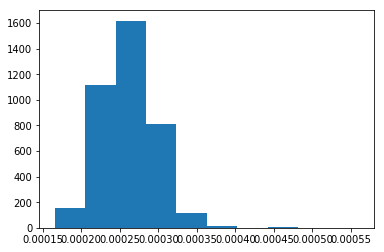

In [17]:
plt.hist(cwn_nv_homo.prob_x2('養').values())

(array([1.860e+02, 1.100e+03, 1.797e+03, 6.700e+02, 6.000e+01, 8.000e+00,
        3.000e+00, 1.000e+00, 2.000e+00, 3.000e+00]),
 array([0.00016902, 0.00020838, 0.00024775, 0.00028712, 0.00032648,
        0.00036585, 0.00040522, 0.00044458, 0.00048395, 0.00052331,
        0.00056268], dtype=float32),
 <a list of 10 Patch objects>)

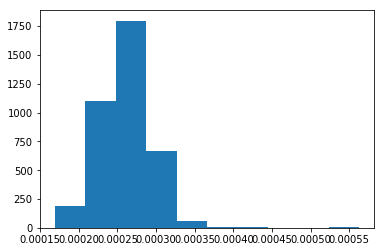

In [18]:
plt.hist(cwn_nv_rw.prob_x2('養').values())

(array([2.240e+02, 7.730e+02, 1.509e+03, 1.114e+03, 1.840e+02, 1.600e+01,
        2.000e+00, 4.000e+00, 1.000e+00, 3.000e+00]),
 array([0.00016338, 0.00020111, 0.00023884, 0.00027656, 0.00031429,
        0.00035202, 0.00038975, 0.00042748, 0.00046521, 0.00050294,
        0.00054067], dtype=float32),
 <a list of 10 Patch objects>)

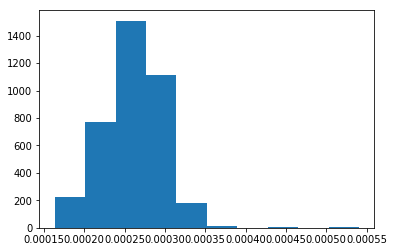

In [19]:
plt.hist(cwn_nv_eq.prob_x2('養').values())

$$
p(x_1, x_2, x_3, x_4) = p(x_2 \mid x_1)\,p(x_3 \mid x_2)\,p(x_4 \mid x_3)
$$

In [30]:
def qie_prob(qie, cwn_nv):
    logP = np.sum(np.log([
        cwn_nv.prob_x2(qie[0])[qie[1]], 
        cwn_nv.prob_x2(qie[1])[qie[2]], 
        cwn_nv.prob_x2(qie[2])[qie[3]], 
    ]))
    return logP

def show_qie_prob(qie):
    print(f'---- {qie} ----')
    print("homophily: ", qie_prob(qie, cwn_nv_homo))
    print("Random Walk: ", qie_prob(qie, cwn_nv_rw))
    print("Struct Equiv: ", qie_prob(qie, cwn_nv_eq))
    print("> values shown are log probabilities")

In [31]:
show_qie_prob("養兒防老")

---- 養兒防老 ----
homophily:  -25.15175
Random Walk:  -25.02118
Struct Equiv:  -24.845314
> values shown are log probabilities


In [32]:
show_qie_prob("相互扶持")

---- 相互扶持 ----
homophily:  -23.825315
Random Walk:  -23.805883
Struct Equiv:  -23.889053
> values shown are log probabilities


In [33]:
show_qie_prob("對牛彈琴")

---- 對牛彈琴 ----
homophily:  -24.727793
Random Walk:  -24.793005
Struct Equiv:  -24.709614
> values shown are log probabilities
